## 📌 Disclaimer
There is limited publicly available data or online reactions specifically addressing Rwanda’s recent shift from flat-rate fares to a distance-based pricing model in public transport. Additionally, due to current limitations in accessing Twitter/X replies without user authentication and because we are not using paid APIs we were unable to collect Twitter data for this project. To ensure a comprehensive and ethical analysis of public sentiment, we relied on publicly accessible and contextually relevant sources of citizen feedback, including: YouTube comment sections on videos discussing fare reforms, Online news comments from platforms such as IGIHE and Kigali Today, where citizens have shared their views on fare price changes in general.

## 1. IGIHE Comments Scraper

In [78]:
!pip install selenium

### Tools and Libraries

In [95]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import time

In [183]:
# Chrome setup
options = Options()
options.add_argument("--start-maximized")
service = Service("C:/Users/robot/chromedriver.exe") #Location where chrome driver is located
driver = webdriver.Chrome(service=service, options=options)

# Load IGIHE article
url = "https://igihe.com/amakuru/u-rwanda/article/hamuritswe-ibiciro-bishya-by-ingendo-mu-rwanda"

driver.get(url)
time.sleep(5)

# Switch to iframe that contains comments
try:
    iframe = driver.find_element(By.ID, "cmtx_iframe")
    driver.switch_to.frame(iframe)
    time.sleep(5)
    print("Switched to comment iframe.")
except:
    print("Could not switch to comment iframe.")
    driver.quit()
    exit()

# Get iframe HTML and parse it
soup = BeautifulSoup(driver.page_source, "html.parser")
driver.quit()

# Parse the comment blocks
comments = soup.select("div.cmtx_comment_box")
results = []

for comment in comments:
    try:
        author = comment.select_one(".cmtx_name_text").get_text(strip=True)
    except:
        author = "Unknown"

    try:
        date = comment.select_one(".cmtx_date_area").get_text(strip=True)
    except:
        date = ""

    try:
        text = comment.select_one(".cmtx_comment_area").get_text(strip=True)
    except:
        text = ""

    if text:
        results.append([author, date, text])
        print(f"{author} ({date}): {text}\n{'-'*50}")


Switched to comment iframe.
Theoneste Bagaragaza (amezi 9 ashize): Good
--------------------------------------------------
X (amezi 11 ashize): Turashimira cyane gahunda nziza yo gutwara abantu muri kigali .Ariko hasigaye ikintu kimwe bigafasha kurushaho umuturage akagenda neza .niba ligne yaruyenzi na gihara ndetse nahandi hari abagenzi benshi cyane,kuki bashyiraho ligne ya nyabugogo gusa Kandi hari abaturage benshi bifuza kujya mumugi gusa?NB:bashyizeho ligne ya nyabugogo na ligne yo mumugi .abantu bakagera Aho bifuza kujya .icyo nicyo ikibazo gisigaye gusa gikomeye muri transport.
--------------------------------------------------
Uzabumwana shaffi (umwaka ushize): Mbo nacyo bizagabanya akajagari kabantu bakora ingedo zitateganyijwe
--------------------------------------------------
Elie kankobwa murundi (umwaka ushize): Yew gahunda n gumamurugo
--------------------------------------------------
Iyamuremye Telesphore (umwaka ushize): Ibi ni sawa cyane! Umuntu azajya ava m'urugo yabi

In [184]:
# Save to DataFrame
igihe_df = pd.DataFrame(results, columns=["Author", "Date", "Comment"])
igihe_df.head()

,Author,Date,Comment
0,Theoneste Bagaragaza,amezi 9 ashize,Good
1,X,amezi 11 ashize,Turashimira cyane gahunda nziza yo gutwara aba...
2,Uzabumwana shaffi,umwaka ushize,Mbo nacyo bizagabanya akajagari kabantu bakora...
3,Elie kankobwa murundi,umwaka ushize,Yew gahunda n gumamurugo
4,Iyamuremye Telesphore,umwaka ushize,Ibi ni sawa cyane! Umuntu azajya ava m'urugo y...


In [98]:
# igihe_df.to_csv("igihe_article_comments.csv", index=False, encoding="utf-8")

In [185]:
print(f"\nDone: Extracted {len(igihe_df)} comments to 'igihe_comments.csv'")


Done: Extracted 36 comments to 'igihe_comments.csv'


## 2. Kigali Today Comments Scraper

### Tools and Libraries

In [186]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re


In [187]:
# Step 1: Load article
url = "https://www.kigalitoday.com/amakuru/amakuru-mu-rwanda/article/dore-ibiciro-bishya-by-ingendo"
headers = {
    "User-Agent": "Mozilla/5.0"
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Step 2: Select all comment containers
comment_blocks = soup.select("div.user_cmtdiv")
results = []

for block in comment_blocks:
    try:
        # Extract comment text
        text = block.select_one("div.user_cmt_div2 p").get_text(strip=True)
    except:
        text = ""

    try:
        # Extract raw string like: "Boniface bucymamohoro yanditse ku itariki ya: 19-04-2025 →"
        meta = block.select_one("div.user_idt").get_text(strip=True)
        # Extract name and date with regex
        match = re.search(r"^(.*?) yanditse ku itariki ya: ([0-9\-]+)", meta)
        if match:
            author = match.group(1).strip()
            date = match.group(2).strip()
        else:
            author, date = "Unknown", ""
    except:
        author, date = "Unknown", ""

    if text:
        results.append([author, date, text])
        print(f"{author} ({date}): {text}\n{'-'*50}")




Unknown (): Nabazaga umuntuvuye ikigal ajyamuri Kenya yujuje ibisabwa yakoresha urugendo rwigihe kinganiki murakoze
--------------------------------------------------
Unknown (): Urugendo kuva ihuye unjya inyamasheke ni angahe
--------------------------------------------------
Unknown (): Njywe nitwa Olivier ntuye kamonyi ruyenzi ngewe mbona hashyirwa imbaraga mukuvugura umuhanda Kigali muhanga ukaguka kuberako imodoka ninyinshi.
--------------------------------------------------
Unknown (): Njywe nitwa Olivier ntuye kamonyi ruyenzi ngewe mbona hashyirwa imbaraga mukuvugura umuhanda Kigali muhanga ukaguka kuberako imodoka ninyinshi.
--------------------------------------------------
Unknown (): Njywe nitwa Olivier ntuye kamonyi ruyenzi ngewe mbona hashyirwa imbaraga mukuvugura umuhanda Kigali muhanga ukaguka kuberako imodoka ninyinshi.
--------------------------------------------------
Unknown (): Njywe nitwa Olivier ntuye kamonyi ruyenzi ngewe mbona hashyirwa imbaraga mukuvugura umuha

In [188]:
# Step 3: Save as CSV
kigali_df = pd.DataFrame(results, columns=["Author", "Time", "Comment"])
kigali_df.head()

,Author,Time,Comment
0,Unknown,,Nabazaga umuntuvuye ikigal ajyamuri Kenya yuju...
1,Unknown,,Urugendo kuva ihuye unjya inyamasheke ni angahe
2,Unknown,,Njywe nitwa Olivier ntuye kamonyi ruyenzi ngew...
3,Unknown,,Njywe nitwa Olivier ntuye kamonyi ruyenzi ngew...
4,Unknown,,Njywe nitwa Olivier ntuye kamonyi ruyenzi ngew...


In [103]:
# kigali_df.to_csv("kigalitoday_comments.csv", index=False, encoding="utf-8")

In [189]:
print(f"\n Extracted {len(kigali_df)} comments to 'kigalitoday_comments.csv'")


 Extracted 12 comments to 'kigalitoday_comments.csv'


## 3. RTV YouTube Channel Comments Scrapper    

In [105]:
!pip install youtube-comment-downloader

from youtube_comment_downloader import *
downloader = YoutubeCommentDownloader() 

In [106]:
video_url = 'https://www.youtube.com/watch?v=9_MsX5jFTTU'
comments = downloader.get_comments_from_url(video_url, sort_by=SORT_BY_POPULAR)


In [107]:
data = []
for comment in comments:
    data.append({
        'author': comment['author'],
        'text': comment['text'],
        'time': comment['time'],
        'votes': comment['votes'],
        'source': 'YouTube',
        'video_url': video_url
    })

import pandas as pd
df1_youtube = pd.DataFrame(data)
df1_youtube

,author,text,time,votes,source,video_url
0,@isaackeic_official,ntazo tuzatega ubwo government izajya izijyend...,1 year ago,12,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU
1,@mukamparayesolange3271,Iki nikibazo pe Leta yarengeye inyungu zu umus...,1 year ago,1,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU
2,@IBISHYATIV250,Murwanga.harakagenda.honyine.sinzahakumbura.Ug...,1 year ago,0,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU
3,@mupenziniyonshuti2722,Yemwe ntaba beshye iyo transport igiciro cyayo...,1 year ago,2,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU
4,@Klaudius-y9n,Ngo impumeko .ibyo utabasha kugira ibyo ubikor...,1 year ago,2,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU
5,@NyiringangoFidele,Ntabwo bikwiye ko umuntu ugarukira muzira arih...,10 months ago,0,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU
6,@gady250tv,Ibiciro by'ingendo barabizamuye cyane bararenz...,1 year ago,0,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU
7,@hakizimanaemmanuel6646,Umva ubundix kuki bahenda abaturage nuko umuha...,1 year ago,0,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU
8,@kruschev-77,Nuko mu Rwanda tutemerewe kwigaragambya ark bi...,1 year ago,0,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU
9,@HabimanaArani-z5k,Rura ikwiye kugabanya ibiciro by'ingenzi kbs,1 year ago,0,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU


Video 2

In [108]:
video_url = 'https://www.youtube.com/watch?v=g4HB-VPFMQc'

comments = downloader.get_comments_from_url(video_url, sort_by=SORT_BY_POPULAR)

data = []
for comment in comments:
    data.append({
        'author': comment['author'],
        'text': comment['text'],
        'time': comment['time'],
        'votes': comment['votes'],
        'source': 'YouTube',
        'video_url': video_url
    })

import pandas as pd
df2_youtube = pd.DataFrame(data)
df2_youtube

,author,text,time,votes,source,video_url
0,@FofoFofo-gd2sd,Baranyirukanye ubu nabuze tik ubundikurara hanze,1 year ago,1,YouTube,https://www.youtube.com/watch?v=g4HB-VPFMQc
1,@FofoFofo-gd2sd,iwacu nicyangugu,1 year ago,1,YouTube,https://www.youtube.com/watch?v=g4HB-VPFMQc
2,@uwamariyabetty2728,Ahubwo se amafaranga bongeyeho ntabaho isanga ...,1 year ago,1,YouTube,https://www.youtube.com/watch?v=g4HB-VPFMQc
3,@bizimanasamuel4120,Nuko nyine ntaho twabariza. Abo bose bari kuvu...,1 year ago,0,YouTube,https://www.youtube.com/watch?v=g4HB-VPFMQc
4,@bizimanasamuel4120,Niba ikoranabuhanga ritarakunda bakomeje ibici...,1 year ago,1,YouTube,https://www.youtube.com/watch?v=g4HB-VPFMQc
5,@bizimanasamuel4120,Mfite ikibazo ziriya modoka zaguzwe na leta? C...,1 year ago,0,YouTube,https://www.youtube.com/watch?v=g4HB-VPFMQc
6,@GatarayihaDieudonne-gq1ft,Si nkibyo abaturage batangiye kugenda n'amagur...,1 year ago,0,YouTube,https://www.youtube.com/watch?v=g4HB-VPFMQc
7,@GatarayihaDieudonne-gq1ft,Ntabwo umuntu ufite imodoka yahawe na Leta afi...,1 year ago,0,YouTube,https://www.youtube.com/watch?v=g4HB-VPFMQc
8,@GatarayihaDieudonne-gq1ft,Aba batumirwa bafite imodoka bahawe na leta im...,1 year ago,0,YouTube,https://www.youtube.com/watch?v=g4HB-VPFMQc


In [109]:

df_youtube = pd.concat([df1_youtube, df2_youtube], ignore_index=True)


In [110]:
df_youtube

,author,text,time,votes,source,video_url
0,@isaackeic_official,ntazo tuzatega ubwo government izajya izijyend...,1 year ago,12,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU
1,@mukamparayesolange3271,Iki nikibazo pe Leta yarengeye inyungu zu umus...,1 year ago,1,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU
2,@IBISHYATIV250,Murwanga.harakagenda.honyine.sinzahakumbura.Ug...,1 year ago,0,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU
3,@mupenziniyonshuti2722,Yemwe ntaba beshye iyo transport igiciro cyayo...,1 year ago,2,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU
4,@Klaudius-y9n,Ngo impumeko .ibyo utabasha kugira ibyo ubikor...,1 year ago,2,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU
5,@NyiringangoFidele,Ntabwo bikwiye ko umuntu ugarukira muzira arih...,10 months ago,0,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU
6,@gady250tv,Ibiciro by'ingendo barabizamuye cyane bararenz...,1 year ago,0,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU
7,@hakizimanaemmanuel6646,Umva ubundix kuki bahenda abaturage nuko umuha...,1 year ago,0,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU
8,@kruschev-77,Nuko mu Rwanda tutemerewe kwigaragambya ark bi...,1 year ago,0,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU
9,@HabimanaArani-z5k,Rura ikwiye kugabanya ibiciro by'ingenzi kbs,1 year ago,0,YouTube,https://www.youtube.com/watch?v=9_MsX5jFTTU


In [111]:
# df_youtube.to_csv("Rwanda_TV_youtube_comments_1_2.csv", index=False)

## Standardize columns 

In [118]:

# Rename to common schema: Author, Date, Comment

df_youtube = df_youtube.rename(columns={
    "author": "Author",
    "time": "Date",
    "text": "Comment"
})[["Author", "Date", "Comment"]]
df_youtube ["Source"] = "YouTube"
df_youtube

,Author,Date,Comment,Source
0,@isaackeic_official,1 year ago,ntazo tuzatega ubwo government izajya izijyend...,YouTube
1,@mukamparayesolange3271,1 year ago,Iki nikibazo pe Leta yarengeye inyungu zu umus...,YouTube
2,@IBISHYATIV250,1 year ago,Murwanga.harakagenda.honyine.sinzahakumbura.Ug...,YouTube
3,@mupenziniyonshuti2722,1 year ago,Yemwe ntaba beshye iyo transport igiciro cyayo...,YouTube
4,@Klaudius-y9n,1 year ago,Ngo impumeko .ibyo utabasha kugira ibyo ubikor...,YouTube
5,@NyiringangoFidele,10 months ago,Ntabwo bikwiye ko umuntu ugarukira muzira arih...,YouTube
6,@gady250tv,1 year ago,Ibiciro by'ingendo barabizamuye cyane bararenz...,YouTube
7,@hakizimanaemmanuel6646,1 year ago,Umva ubundix kuki bahenda abaturage nuko umuha...,YouTube
8,@kruschev-77,1 year ago,Nuko mu Rwanda tutemerewe kwigaragambya ark bi...,YouTube
9,@HabimanaArani-z5k,1 year ago,Rura ikwiye kugabanya ibiciro by'ingenzi kbs,YouTube


In [119]:
igihe_df = igihe_df.rename(columns=str.title)
igihe_df["Source"] = "IGIHE"
igihe_df

,Author,Date,Comment,Source
0,Theoneste Bagaragaza,amezi 9 ashize,Good,IGIHE
1,X,amezi 11 ashize,Turashimira cyane gahunda nziza yo gutwara aba...,IGIHE
2,Uzabumwana shaffi,umwaka ushize,Mbo nacyo bizagabanya akajagari kabantu bakora...,IGIHE
3,Elie kankobwa murundi,umwaka ushize,Yew gahunda n gumamurugo,IGIHE
4,Iyamuremye Telesphore,umwaka ushize,Ibi ni sawa cyane! Umuntu azajya ava m'urugo y...,IGIHE
5,Usa,umwaka ushize,In economics force of demand and supply niyo d...,IGIHE
6,Kgl,umwaka ushize,Abantu mwese mwakoze comments nimujye kuri you...,IGIHE
7,Ruta,umwaka ushize,The government of rwanda is confirming inflati...,IGIHE
8,Kavi,umwaka ushize,"Leta iratureberera hhhhhhBible iravugango, ......",IGIHE
9,Benitte,umwaka ushize,Ingendo zitari ngobwa zarahagaze,IGIHE


In [123]:
kigali_df = kigali_df.rename(columns=str.title)
kigali_df = kigali_df.rename(columns={"Time": "Date"})

kigali_df["Source"] = "Kigali Today"
kigali_df

,Author,Date,Comment,Source
0,Unknown,,Nabazaga umuntuvuye ikigal ajyamuri Kenya yuju...,Kigali Today
1,Unknown,,Urugendo kuva ihuye unjya inyamasheke ni angahe,Kigali Today
2,Unknown,,Njywe nitwa Olivier ntuye kamonyi ruyenzi ngew...,Kigali Today
3,Unknown,,Njywe nitwa Olivier ntuye kamonyi ruyenzi ngew...,Kigali Today
4,Unknown,,Njywe nitwa Olivier ntuye kamonyi ruyenzi ngew...,Kigali Today
5,Unknown,,Njywe nitwa Olivier ntuye kamonyi ruyenzi ngew...,Kigali Today
6,Unknown,,Murakoze kubwamakuru meza mutugezaho.Nashakaga...,Kigali Today
7,Unknown,,Nibyiza pe mbese ibiciro bishirwaho hagendewe ...,Kigali Today
8,Unknown,,Mwaramutse neza!! Nashakaga kubaza ko nta bici...,Kigali Today
9,Unknown,,Mifotra yadufasha kuko usanga system ya mifotr...,Kigali Today


In [129]:
# --- Combine all ---
all_comments = pd.concat([df_youtube, igihe_df, kigali_df], ignore_index=True)
all_comments


,Author,Date,Comment,Source
0,@isaackeic_official,1 year ago,ntazo tuzatega ubwo government izajya izijyend...,YouTube
1,@mukamparayesolange3271,1 year ago,Iki nikibazo pe Leta yarengeye inyungu zu umus...,YouTube
2,@IBISHYATIV250,1 year ago,Murwanga.harakagenda.honyine.sinzahakumbura.Ug...,YouTube
3,@mupenziniyonshuti2722,1 year ago,Yemwe ntaba beshye iyo transport igiciro cyayo...,YouTube
4,@Klaudius-y9n,1 year ago,Ngo impumeko .ibyo utabasha kugira ibyo ubikor...,YouTube
...,...,...,...,...
84,Unknown,,Nibyiza pe mbese ibiciro bishirwaho hagendewe ...,Kigali Today
85,Unknown,,Mwaramutse neza!! Nashakaga kubaza ko nta bici...,Kigali Today
86,Unknown,,Mifotra yadufasha kuko usanga system ya mifotr...,Kigali Today
87,Unknown,,Mifotra yadufasha kuko usanga system ya mifotr...,Kigali Today


In [131]:
# --- Save merged data ---
all_comments.to_csv("all_scrapped_comments.csv", index=False, encoding="utf-8")


In [134]:
# --- Save merged data as Excel ---
!pip install openpyxl

In [135]:
all_comments.to_excel("all_scrapped_comments.xlsx", index=False)

# ---------------------------------------------
# 📘 Kinyarwanda Lexicon-Based Sentiment Analysis
# ---------------------------------------------


In [143]:
# ---------------------------------------------
# 📘 Kinyarwanda Lexicon-Based Sentiment Analysis
# Applied to the merged all_scrapped_comments dataset
# ---------------------------------------------

# Step 1: Define a simple Kinyarwanda sentiment lexicon
kiny_sentiment_lexicon = {
    # Positive
    "byiza": "Positive",
    "meza": "Positive",
    "neza": "Positive",
    "ishimwe": "Positive",
    "gushima": "Positive",
    "turashimira": "Positive",
    "intambwe": "Positive",
    "gukemura": "Positive",
    "iterambere": "Positive",
    "korohereza": "Positive",

    # Negative
    "ikibazo": "Negative",
    "akabije": "Negative",
    "guhenda": "Negative",
    "bibi": "Negative",
    "kubabaza": "Negative",
    "kwinubira": "Negative",
    "kurenganya": "Negative",
    "igiciro": "Negative",
    "gucika intege": "Negative",
    "ntibyumvikana": "Negative",
    "kudaha agaciro": "Negative",
    "birababaje": "Negative",
    "bihenze": "Negative",
    "kwijujuta": "Negative",
    "kunenga": "Negative",
    "kubangamira": "Negative", 
    "sinzahakumbura": "Negative",

    # Neutral / Mixed
    "gusa": "Neutral",
    "rwose": "Neutral",
    "nibyo": "Neutral",
    "ariko": "Neutral",
    "ubwo": "Neutral",
    "nubwo": "Neutral",
    "ubusanzwe": "Neutral",
    "gutanga ibisobanuro": "Positive"

}


# Step 2: Define a classifier function

def classify_kinyarwanda_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return "Neutral"

    text = text.lower()
    found = {"Positive": 0, "Negative": 0, "Neutral": 0}

    for word in kiny_sentiment_lexicon:
        if word in text:
            found[kiny_sentiment_lexicon[word]] += 1

    # Assign sentiment based on the majority of matched keywords
    if found["Positive"] > found["Negative"]:
        return "Positive"
    elif found["Negative"] > found["Positive"]:
        return "Negative"
    elif found["Positive"] == found["Negative"] and found["Positive"] > 0:
        return "Neutral"
    else:
        return "Neutral"

# Step 3: Apply it to the comment column
all_comments["Sentiment_Kiny"] = all_comments["Comment"].apply(classify_kinyarwanda_sentiment)

# Step 4:some results
all_comments[["Source", "Author", "Date", "Comment", "Sentiment_Kiny"]].head(10)


,Source,Author,Date,Comment,Sentiment_Kiny
0,YouTube,@isaackeic_official,1 year ago,ntazo tuzatega ubwo government izajya izijyend...,Neutral
1,YouTube,@mukamparayesolange3271,1 year ago,Iki nikibazo pe Leta yarengeye inyungu zu umus...,Negative
2,YouTube,@IBISHYATIV250,1 year ago,Murwanga.harakagenda.honyine.sinzahakumbura.Ug...,Negative
3,YouTube,@mupenziniyonshuti2722,1 year ago,Yemwe ntaba beshye iyo transport igiciro cyayo...,Negative
4,YouTube,@Klaudius-y9n,1 year ago,Ngo impumeko .ibyo utabasha kugira ibyo ubikor...,Neutral
5,YouTube,@NyiringangoFidele,10 months ago,Ntabwo bikwiye ko umuntu ugarukira muzira arih...,Neutral
6,YouTube,@gady250tv,1 year ago,Ibiciro by'ingendo barabizamuye cyane bararenz...,Negative
7,YouTube,@hakizimanaemmanuel6646,1 year ago,Umva ubundix kuki bahenda abaturage nuko umuha...,Positive
8,YouTube,@kruschev-77,1 year ago,Nuko mu Rwanda tutemerewe kwigaragambya ark bi...,Negative
9,YouTube,@HabimanaArani-z5k,1 year ago,Rura ikwiye kugabanya ibiciro by'ingenzi kbs,Neutral


In [147]:
all_comments.to_excel("kinyarwanda_sentiment.xlsx", index=False)

In [148]:
all_comments.nunique()

Author            70
Date               6
Comment           82
Source             3
Sentiment_Kiny     3
dtype: int64

In [149]:
all_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Author          89 non-null     object
 1   Date            89 non-null     object
 2   Comment         89 non-null     object
 3   Source          89 non-null     object
 4   Sentiment_Kiny  89 non-null     object
dtypes: object(5)
memory usage: 3.6+ KB


#### Group data by Source and Sentiment_Kiny

In [151]:
import pandas as pd

# Group data by Source and Sentiment_Kiny
sentiment_counts = all_comments.groupby(['Source', 'Sentiment_Kiny']).size().unstack(fill_value=0)
sentiment_counts

Sentiment_Kiny,Negative,Neutral,Positive
Source,,,
IGIHE,4,28,4
Kigali Today,0,9,3
YouTube,12,28,1


# Sentiment Distribution by Source

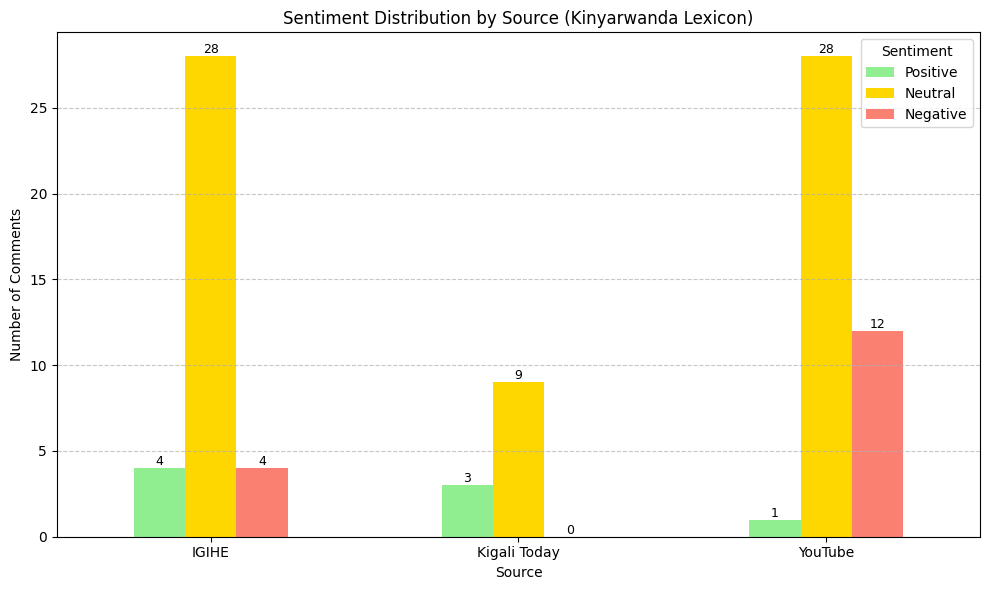

In [162]:
import matplotlib.pyplot as plt

# Define colors for sentiments
colors = {
    'Positive': 'lightgreen',
    'Neutral': 'gold',
    'Negative': 'salmon'
}

# Ensure the columns are in the desired order
sentiment_order = ['Positive', 'Neutral', 'Negative']
sentiment_counts = sentiment_counts.reindex(columns=sentiment_order)

# Plot the bar chart
ax = sentiment_counts.plot(kind='bar', figsize=(10, 6), color=[colors[sentiment] for sentiment in sentiment_order])

# Add labels and title
plt.title('Sentiment Distribution by Source (Kinyarwanda Lexicon)')
plt.xlabel('Source')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with counts
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()


## Key Insights
Neutral sentiment is the most dominant across all sources, especially on YouTube and IGIHE.
YouTube has a notably higher count of negative comments compared to other sources, while Kigali Today has no negative comments at all.

# Overall Sentiment Breakdown

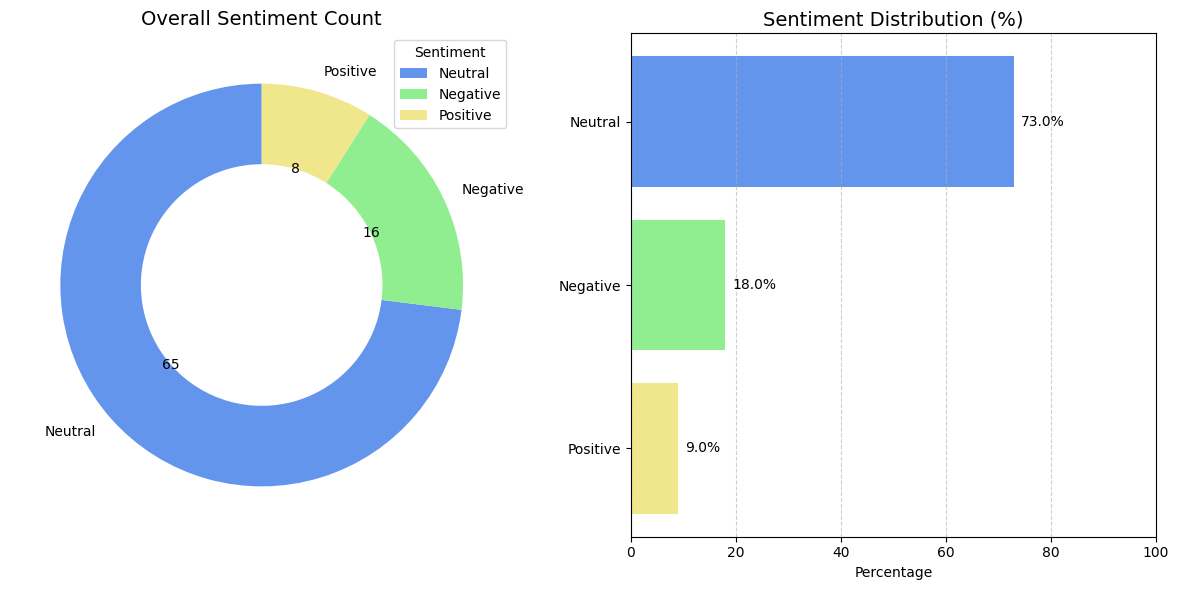

In [180]:
# Plot donut chart (real counts) + horizontal bar chart (percentages) side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Donut chart — real counts
sentiment_counts = all_comments["Sentiment_Kiny"].value_counts().reindex(["Neutral", "Negative", "Positive"]).fillna(0)
colors = ["cornflowerblue", "lightgreen", "khaki"]
wedges, texts, autotexts = axes[0].pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct=lambda pct: f'{int(round(pct/100.*sum(sentiment_counts)))}',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)
)
axes[0].set_title("Overall Sentiment Count", fontsize=14)
axes[0].legend(sentiment_counts.index, loc="upper right", title="Sentiment")

# Horizontal bar chart — percentages
sentiment_percent = all_comments["Sentiment_Kiny"].value_counts(normalize=True).mul(100).round(2)
sentiment_percent = sentiment_percent.reindex(["Positive", "Negative", "Neutral"])

bars = axes[1].barh(sentiment_percent.index, sentiment_percent.values, color=["khaki", "lightgreen", "cornflowerblue"])
axes[1].set_xlim(0, 100)
axes[1].set_title("Sentiment Distribution (%)", fontsize=14)
axes[1].set_xlabel("Percentage")
axes[1].grid(axis='x', linestyle='--', alpha=0.6)

# Annotate bars
for bar in bars:
    width = bar.get_width()
    axes[1].annotate(f'{width:.1f}%',
                     xy=(width, bar.get_y() + bar.get_height() / 2),
                     xytext=(5, 0),
                     textcoords="offset points",
                     ha="left",
                     va="center",
                     fontsize=10)

plt.tight_layout()
plt.show()


## Comment Volume by Source

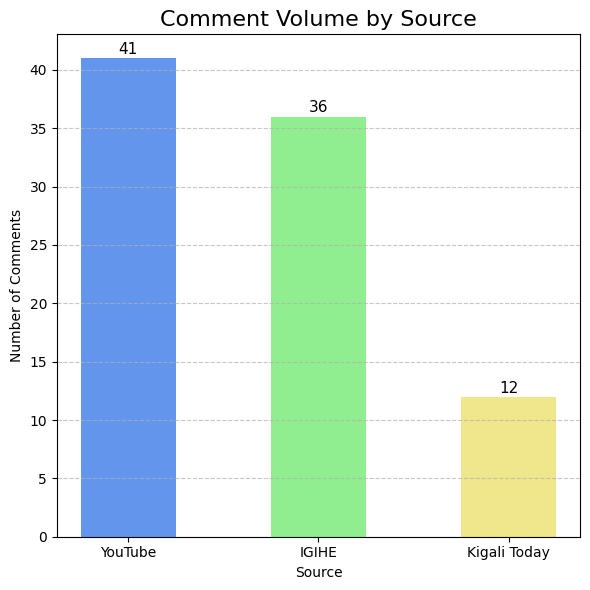

In [179]:
# Redefine volume_by_source to fix the NameError
volume_by_source = all_comments["Source"].value_counts()

# Define colors
bar_colors = ["cornflowerblue", "lightgreen", "khaki"]

# Ensure consistent color mapping across sources
ordered_sources = volume_by_source.index.tolist()
colors_map = dict(zip(ordered_sources, bar_colors[:len(ordered_sources)]))
bar_colors_used = [colors_map.get(src, "gray") for src in volume_by_source.index]

# Plot with matching donut chart aesthetics
fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(volume_by_source.index, volume_by_source.values, color=bar_colors_used, width=0.5)

# Add value annotations
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha="center",
                fontsize=11)

ax.set_title("Comment Volume by Source", fontsize=16)
ax.set_xlabel("Source")
ax.set_ylabel("Number of Comments")
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Sentiment by Source

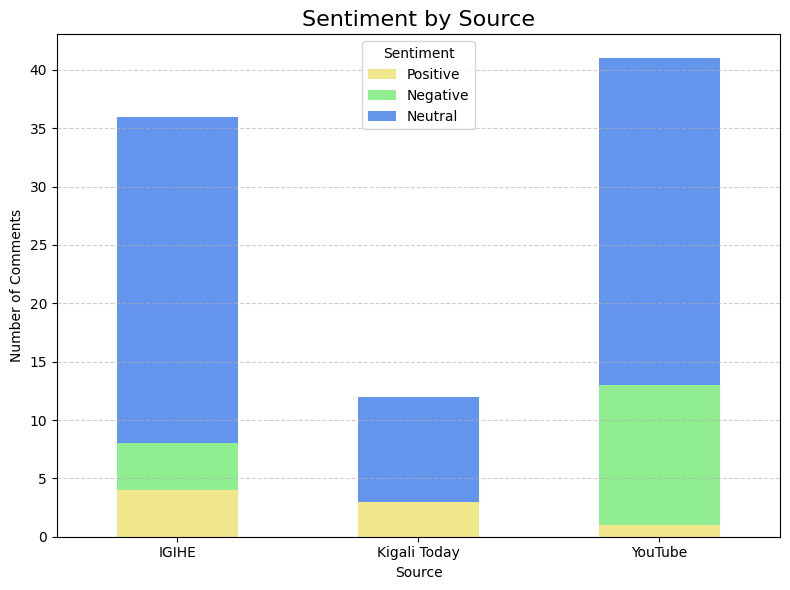

In [181]:
# Generate a stacked bar chart from the sentiment pivot table
pivot_sentiment = pd.pivot_table(
    all_comments,
    values="Comment",
    index="Source",
    columns="Sentiment_Kiny",
    aggfunc="count",
    fill_value=0
)

# Sort columns to match consistent sentiment order
sentiment_order = ["Positive", "Negative", "Neutral"]
pivot_sentiment = pivot_sentiment.reindex(columns=sentiment_order)

# Plot stacked bar chart
pivot_sentiment.plot(kind="bar", stacked=True, figsize=(8, 6), color=["khaki", "lightgreen", "cornflowerblue"])

plt.title("Sentiment by Source", fontsize=16)
plt.xlabel("Source")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.legend(title="Sentiment")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
